# Real-World Example: Complete K-Means Workflow

This notebook demonstrates a complete, production-ready K-Means workflow using a **real dataset from Kaggle**.

## Dataset: Mall Customer Segmentation
- **Source**: Kaggle - Mall Customer Segmentation Data
- **Samples**: 200 mall customers
- **Features**: CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)
- **Business Goal**: Identify customer segments for targeted marketing campaigns

## How to Get the Data

### Option 1: Direct CSV Link (Used Here)
```python
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
```

### Option 2: Kaggle API (Alternative)
1. Install: `pip install kaggle`
2. Setup API credentials from kaggle.com/settings
3. Download: `kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python`

## Code Walkthrough

### 1. Import Libraries
Standard data science stack for clustering analysis.

### 2. Load Real Dataset from Kaggle
- Downloads CSV directly from GitHub mirror of Kaggle dataset
- Uses **pandas** to load and inspect the data
- This is **real customer data** from a shopping mall!

### 3. Data Preprocessing
- **Select relevant features**: Age, Annual Income, Spending Score (ignore CustomerID and Gender for now)
- **Handle missing values**: Check and clean if needed
- **Feature scaling**: CRITICAL step for K-Means to work properly

### 4. Finding Optimal K: Two-Method Approach

#### Method A: Elbow Method
- Tests K from 2 to 10 clusters
- Calculates **inertia** (within-cluster sum of squares) for each K
- Lower inertia = tighter clusters
- **Look for**: The "elbow" where improvement slows down

#### Method B: Silhouette Score
- Measures how well points fit in their assigned cluster vs. other clusters
- **Range**: -1 (wrong cluster) to +1 (perfect fit)
- **Look for**: Highest silhouette score
- **Interpretation**:
  - > 0.7: Strong clustering
  - 0.5-0.7: Reasonable structure
  - < 0.5: Weak/artificial clusters

### 5. Visualization: Side-by-Side Comparison
- **Left plot**: Elbow curve (look for bend)
- **Right plot**: Silhouette scores (look for peak)
- **Decision**: Choose K where both methods agree or make a trade-off

### 6. Final Clustering
- Apply K-Means with chosen K (based on plots)
- **`np.bincount()`**: Shows how many customers in each segment
- Analyze cluster characteristics for business insights

## Best Practices Demonstrated
1. Use real data from Kaggle (not synthetic)
2. **Always scale features** before K-Means
3. Combine multiple metrics (elbow + silhouette)
4. Visualize results to make informed decisions
5. Validate cluster sizes for business viability

Dataset loaded successfully!

Dataset shape: (200, 5)

First few rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

Column names: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Data types:
CustomerID                 int64
Genre   

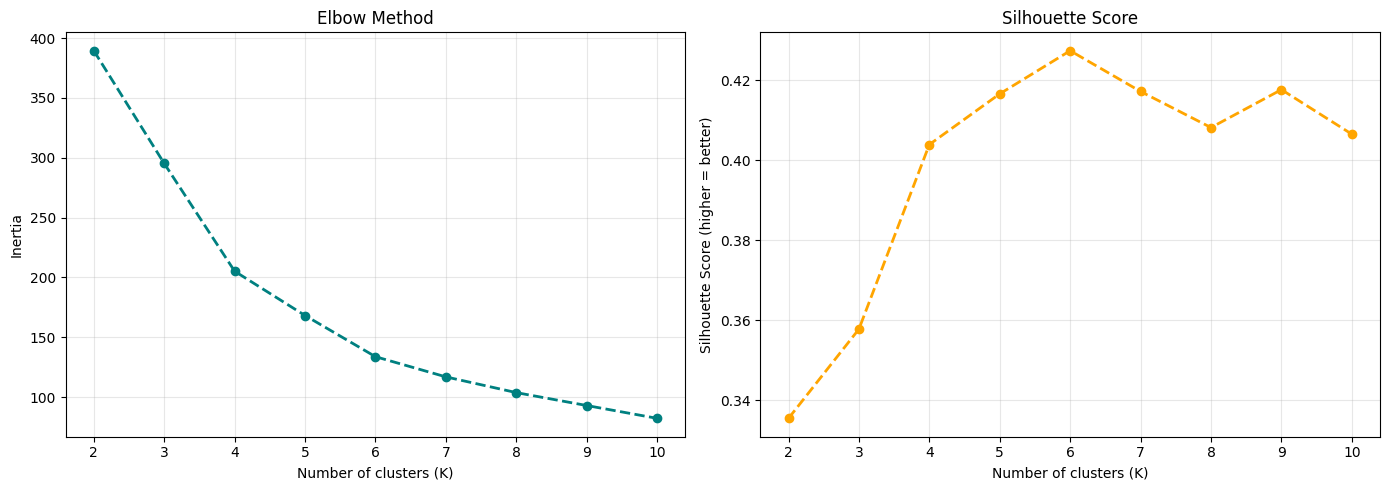


Final clustering with K=5:
Cluster sizes: [20 54 40 39 47]
Silhouette score: 0.417

Cluster Characteristics (averages):
           Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                   
0        46.25               26.75                   18.35
1        25.19               41.09                   62.24
2        32.88               86.10                   81.53
3        39.87               86.10                   19.36
4        55.64               54.38                   48.85


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"

df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(10))
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nBasic statistics:\n{df.describe()}")


X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

print(f"\n\nFeatures selected for clustering: {['Age', 'Annual Income (k$)', 'Spending Score (1-100)']}")
print(f"Feature matrix shape: {X.shape}")

# ── Very important: Scale the features! ──────────────────────────
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures scaled successfully!")
print(f"Scaled data mean: {X_scaled.mean(axis=0)}")  # Should be ~0
print(f"Scaled data std: {X_scaled.std(axis=0)}")    # Should be ~1

inertias = []
sil_scores = []
K_range = range(2, 11)

print(f"\nTesting different numbers of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"  K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_score(X_scaled, kmeans.labels_):.3f}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'o--', color='teal', linewidth=2)
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters (K)')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, sil_scores, 'o--', color='orange', linewidth=2)
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Number of clusters (K)')
ax2.set_ylabel('Silhouette Score (higher = better)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


best_k = 5   
kmeans_final = KMeans(n_clusters=best_k, n_init=12, random_state=42)
kmeans_final.fit(X_scaled)

df['Cluster'] = kmeans_final.labels_

print(f"\n{'='*60}")
print(f"Final clustering with K={best_k}:")
print(f"{'='*60}")
print(f"Cluster sizes: {np.bincount(kmeans_final.labels_)}")
print(f"Silhouette score: {silhouette_score(X_scaled, kmeans_final.labels_):.3f}")

print(f"\nCluster Characteristics (averages):")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2))

## Visualize Customer Segments

We'll create multiple views to understand the customer segments:
1. **Income vs Spending Score** - Most important for marketing
2. **Age vs Spending Score** - Age-based spending patterns
3. **Age vs Income** - Demographics correlation

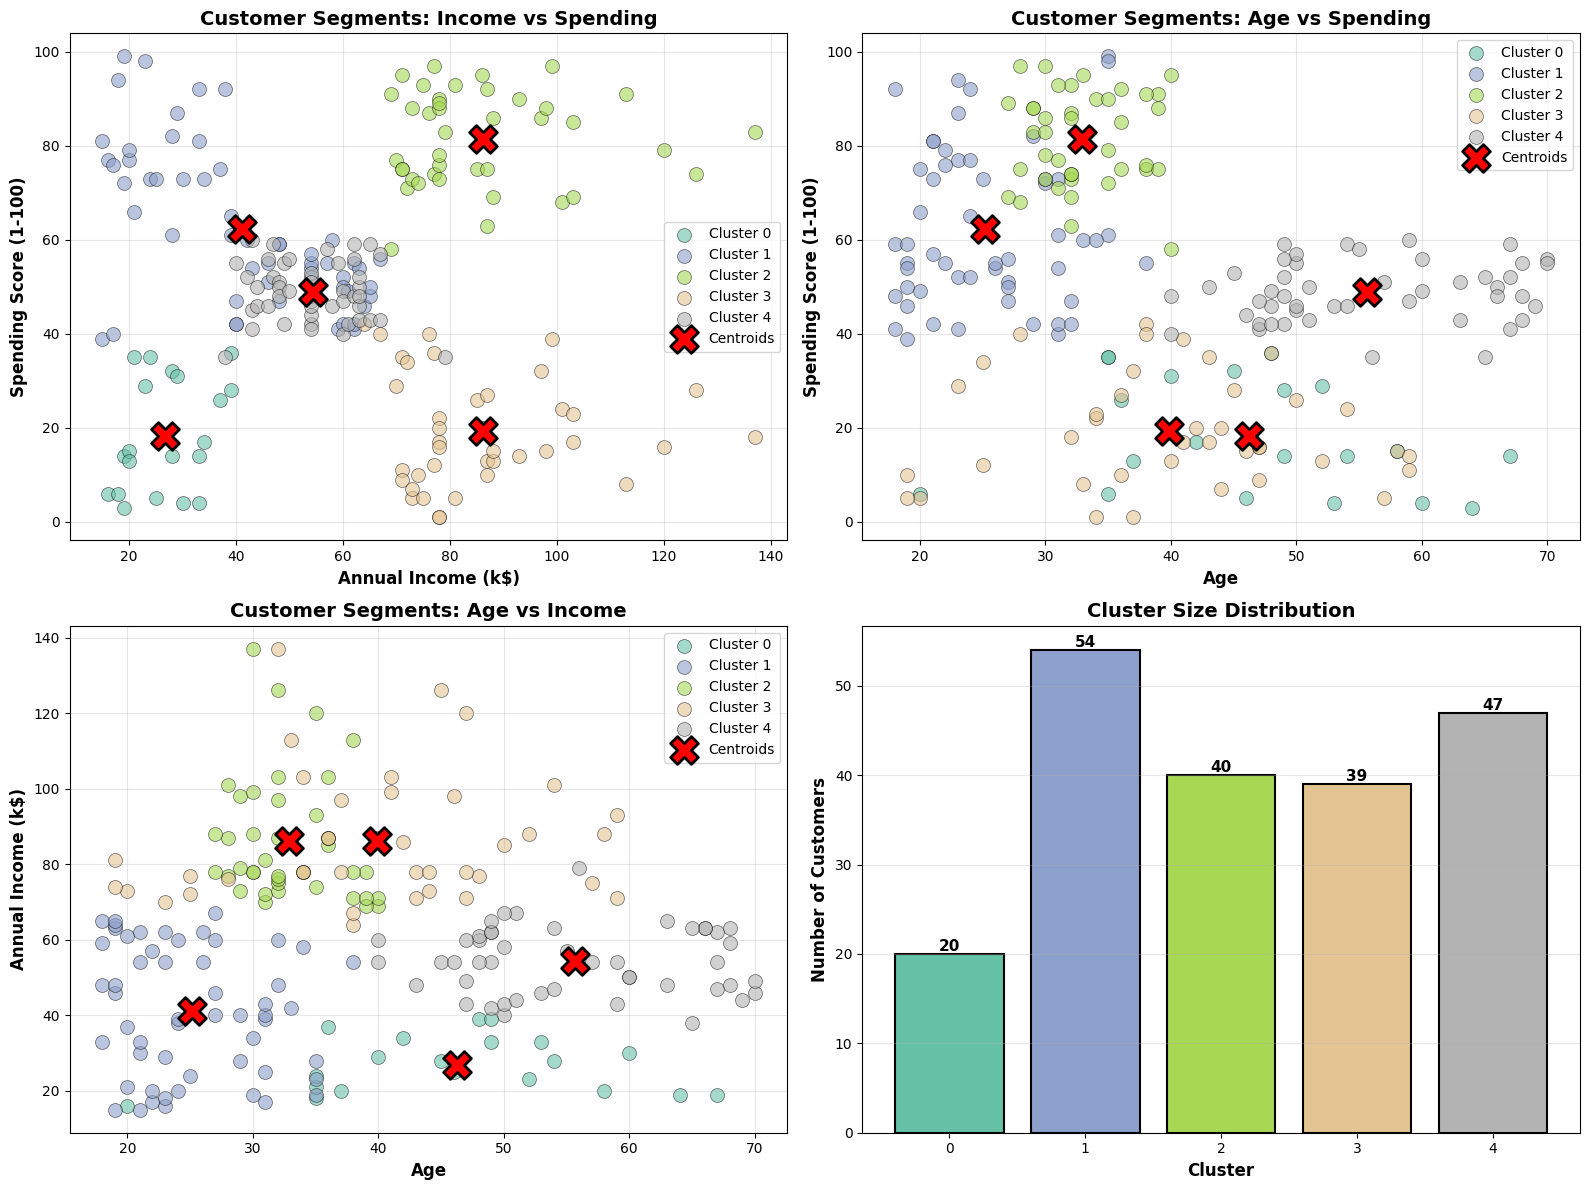


BUSINESS INSIGHTS - Customer Segment Profiles

Cluster 0: 20 customers (10.0%)
  • Average Age: 46.2 years
  • Average Income: $26.8k
  • Average Spending Score: 18.4/100
  • Gender data: Not available in dataset

Cluster 1: 54 customers (27.0%)
  • Average Age: 25.2 years
  • Average Income: $41.1k
  • Average Spending Score: 62.2/100
  • Gender data: Not available in dataset

Cluster 2: 40 customers (20.0%)
  • Average Age: 32.9 years
  • Average Income: $86.1k
  • Average Spending Score: 81.5/100
  • Gender data: Not available in dataset

Cluster 3: 39 customers (19.5%)
  • Average Age: 39.9 years
  • Average Income: $86.1k
  • Average Spending Score: 19.4/100
  • Gender data: Not available in dataset

Cluster 4: 47 customers (23.5%)
  • Average Age: 55.6 years
  • Average Income: $54.4k
  • Average Spending Score: 48.9/100
  • Gender data: Not available in dataset


In [15]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Get cluster colors
colors = plt.cm.Set2(np.linspace(0, 1, best_k))

# Plot 1: Income vs Spending Score (most important!)
ax1 = axes[0, 0]
for cluster in range(best_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax1.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score (1-100)'],
                s=100, c=[colors[cluster]], alpha=0.6, 
                edgecolors='black', linewidth=0.5,
                label=f'Cluster {cluster}')

# Plot centroids (need to inverse transform to original scale)
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
ax1.scatter(centroids_original[:, 1], centroids_original[:, 2],  # Income is index 1, Spending is index 2
            s=400, c='red', marker='X', 
            edgecolors='black', linewidth=2, label='Centroids', zorder=10)

ax1.set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax1.set_title('Customer Segments: Income vs Spending', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
ax2 = axes[0, 1]
for cluster in range(best_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax2.scatter(cluster_data['Age'], 
                cluster_data['Spending Score (1-100)'],
                s=100, c=[colors[cluster]], alpha=0.6, 
                edgecolors='black', linewidth=0.5,
                label=f'Cluster {cluster}')

ax2.scatter(centroids_original[:, 0], centroids_original[:, 2],  # Age is index 0, Spending is index 2
            s=400, c='red', marker='X', 
            edgecolors='black', linewidth=2, label='Centroids', zorder=10)

ax2.set_xlabel('Age', fontsize=12, fontweight='bold')
ax2.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax2.set_title('Customer Segments: Age vs Spending', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

# Plot 3: Age vs Income
ax3 = axes[1, 0]
for cluster in range(best_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax3.scatter(cluster_data['Age'], 
                cluster_data['Annual Income (k$)'],
                s=100, c=[colors[cluster]], alpha=0.6, 
                edgecolors='black', linewidth=0.5,
                label=f'Cluster {cluster}')

ax3.scatter(centroids_original[:, 0], centroids_original[:, 1],  # Age is index 0, Income is index 1
            s=400, c='red', marker='X', 
            edgecolors='black', linewidth=2, label='Centroids', zorder=10)

ax3.set_xlabel('Age', fontsize=12, fontweight='bold')
ax3.set_ylabel('Annual Income (k$)', fontsize=12, fontweight='bold')
ax3.set_title('Customer Segments: Age vs Income', fontsize=14, fontweight='bold')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)

# Plot 4: Cluster size comparison
ax4 = axes[1, 1]
cluster_counts = df['Cluster'].value_counts().sort_index()
bars = ax4.bar(cluster_counts.index, cluster_counts.values, 
               color=colors[:len(cluster_counts)], 
               edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax4.set_title('Cluster Size Distribution', fontsize=14, fontweight='bold')
ax4.set_xticks(range(best_k))
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print business insights
print("\n" + "="*80)
print("BUSINESS INSIGHTS - Customer Segment Profiles")
print("="*80)
for cluster in range(best_k):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster}: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  • Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  • Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  • Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    
    # Check if Gender column exists
    if 'Gender' in cluster_data.columns:
        print(f"  • Gender distribution: {cluster_data['Gender'].value_counts().to_dict()}")
    else:
        print(f"  • Gender data: Not available in dataset")

## Marketing Strategy Recommendations

Based on the customer segments identified, here are actionable marketing strategies:

### Typical Segment Patterns (adjust based on your actual results):

**High-Value Segments** (High Income + High Spending):
- **Strategy**: VIP treatment, premium products, exclusive offers
- **Marketing**: Email campaigns for luxury items, early access to sales
- **Action**: Loyalty program with high-tier benefits

**Target Segments** (Medium-High Income + Low-Medium Spending):
- **Strategy**: Convert to higher spenders through targeted promotions
- **Marketing**: Personalized recommendations, limited-time offers
- **Action**: Identify barriers to spending (price sensitivity, product fit)

**Budget Segments** (Low-Medium Income + Low Spending):
- **Strategy**: Volume-based approach, value propositions
- **Marketing**: Discount campaigns, bundle deals, clearance items
- **Action**: Focus on affordability and value messaging

**Careful Spenders** (High Income + Low Spending):
- **Strategy**: Build trust, emphasize quality over quantity
- **Marketing**: Product reviews, quality certifications, warranties
- **Action**: Educational content about product value

**Young Enthusiasts** (Younger age groups with varied income):
- **Strategy**: Trendy products, social media marketing
- **Marketing**: Instagram/TikTok campaigns, influencer partnerships
- **Action**: Create shareable experiences and products
